In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# importing the from excel sheet
data = pd.read_excel('fractional flow.xlsx')
data

,Unnamed: 0,Sw,Kro/Krw,fw,dfw/dsw
0,1,0.20,0.00,0.000000,0.000000
1,2,0.25,30.23,0.062054,1.241080
2,3,0.30,17.00,0.105263,0.864183
3,4,0.35,9.56,0.173010,1.354944
4,5,0.40,5.38,0.271003,1.959847
5,6,0.45,3.02,0.398406,2.548073
6,7,0.50,1.70,0.540541,2.842683
7,8,0.55,0.96,0.675676,2.702703
8,9,0.60,0.54,0.787402,2.234518
9,10,0.65,0.30,0.869565,1.643273


In [4]:
# making the faovurable adjustmenty in dataframe
data = data.drop(columns=['Unnamed: 0'])
data
data = data.drop(index = 12)

In [5]:
# calculation of the dfw/dsw with accountation of capillaury pressure
sw = np.array(data['Sw'])
F = np.array(data['dfw/dsw'])
sw = sw.tolist()
F = F.tolist()
for i in range(len(F)):
    if sw[i] >= 0.6:
        break
    else:
        F[i] = F[8]
        

In [6]:
# adding the calculated columns into dataframe at last position
data['(dfw/dsw)ca'] = F

data

,Sw,Kro/Krw,fw,dfw/dsw,(dfw/dsw)ca
0,0.20,0.00,0.000000,0.000000,2.234518
1,0.25,30.23,0.062054,1.241080,2.234518
2,0.30,17.00,0.105263,0.864183,2.234518
3,0.35,9.56,0.173010,1.354944,2.234518
4,0.40,5.38,0.271003,1.959847,2.234518
5,0.45,3.02,0.398406,2.548073,2.234518
6,0.50,1.70,0.540541,2.842683,2.234518
7,0.55,0.96,0.675676,2.702703,2.234518
8,0.60,0.54,0.787402,2.234518,2.234518
9,0.65,0.30,0.869565,1.643273,1.643273


In [7]:
# converting columns into array
slope2 = np.array(data['(dfw/dsw)ca'])
slope1 = np.array(data['dfw/dsw'])

Text(0, 0.5, 'dfw/dsw')

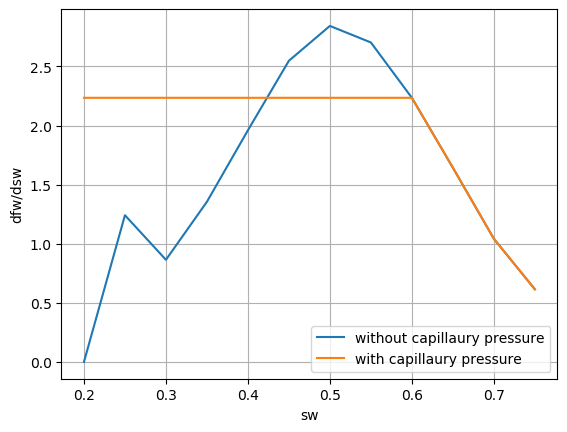

In [8]:
# visulaizing the dfw/dsw with accountation of capillaury pressure and without accountation of capillaury pressure
plt.style.use('default')
plt.plot(sw,slope1,label='without capillaury pressure')
plt.plot(sw,slope2,label='with capillaury pressure')
plt.legend()
plt.grid(True)
plt.xlabel('sw')
plt.ylabel('dfw/dsw')

    

Area of rservoir =26400
how much Days = 3
porosity = 0.25
injection rate = 900
Day = 60
Day = 120
Day = 240


,Sw,Kro/Krw,fw,dfw/dsw,(dfw/dsw)ca,60 days(ft),120 days(ft),240 days(ft)
0,0.20,0.00,0.000000,0.000000,2.234518,102.655787,205.311575,410.623150
1,0.25,30.23,0.062054,1.241080,2.234518,102.655787,205.311575,410.623150
2,0.30,17.00,0.105263,0.864183,2.234518,102.655787,205.311575,410.623150
3,0.35,9.56,0.173010,1.354944,2.234518,102.655787,205.311575,410.623150
4,0.40,5.38,0.271003,1.959847,2.234518,102.655787,205.311575,410.623150
5,0.45,3.02,0.398406,2.548073,2.234518,102.655787,205.311575,410.623150
6,0.50,1.70,0.540541,2.842683,2.234518,102.655787,205.311575,410.623150
7,0.55,0.96,0.675676,2.702703,2.234518,102.655787,205.311575,410.623150
8,0.60,0.54,0.787402,2.234518,2.234518,102.655787,205.311575,410.623150
9,0.65,0.30,0.869565,1.643273,1.643273,75.493449,150.986897,301.973795


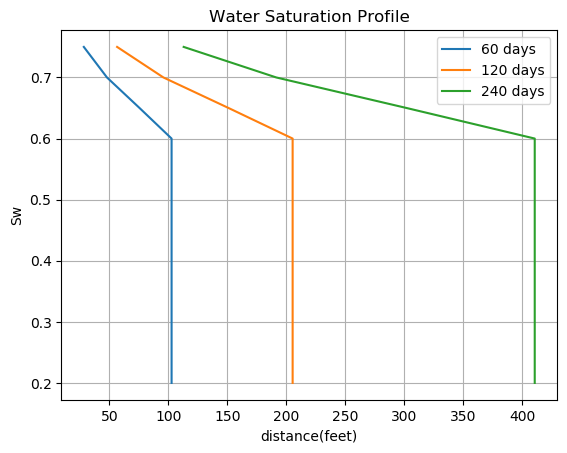

In [9]:
# inputing the important parameter area,porosity,day 
# visulizing the saturation profile by the use of frontal advaned equation for perticular reservoir 
# dataframe after adding the distance of saturation at different time

A = int(input('Area of rservoir ='))
l = int(input('how much Days = '))
P = float(input('porosity = '))
iw = int(input('injection rate = '))

for m in range(0,l):
    t = int(input('Day = '))
    x = ((5.615*iw*t)/(P*A))*slope2
    data[f'{t} days(ft)'] = x
    plt.style.use('default')
    plt.plot(x,sw,label= f'{t} days')
    plt.legend()
    plt.grid(True)
    plt.title('Water Saturation Profile')
    plt.xlabel('distance(feet)')
    plt.ylabel('Sw')
  
data

In [10]:
# dataframe after adding the distance of saturation at different time